## <font color = blue> Case study on unsupervised learning

### Import the necessary libraries & Load the dataset into python environment :

In [1]:
import numpy as np
import pandas as pd

# Plotting the data:
import matplotlib.pyplot as plt
import seaborn as sns 

# Preprocessing the dataset:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Perform the clustering and silhouette score calculations:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

In [2]:
# Remove warnings:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
data = pd.read_csv(r'C:\Users\sajee\Downloads\AATHIRA DSA\Wine_clust .csv') 
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Perform data understanding and exploration:

In [4]:
data.shape

(178, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [7]:
%whos

Variable                  Type         Data/Info
------------------------------------------------
AgglomerativeClustering   type         <class 'sklearn.cluster._<...>AgglomerativeClustering'>
DBSCAN                    type         <class 'sklearn.cluster._dbscan.DBSCAN'>
KMeans                    ABCMeta      <class 'sklearn.cluster._kmeans.KMeans'>
LabelEncoder              type         <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
MinMaxScaler              type         <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
PCA                       ABCMeta      <class 'sklearn.decomposition._pca.PCA'>
StandardScaler            type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
calinski_harabasz_score   function     <function calinski_haraba<...>re at 0x00000246E682D900>
data                      DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]
davies_bouldin_score      function     <function davies_bouldin_<...>re at 0x00000246E682D99

In [8]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


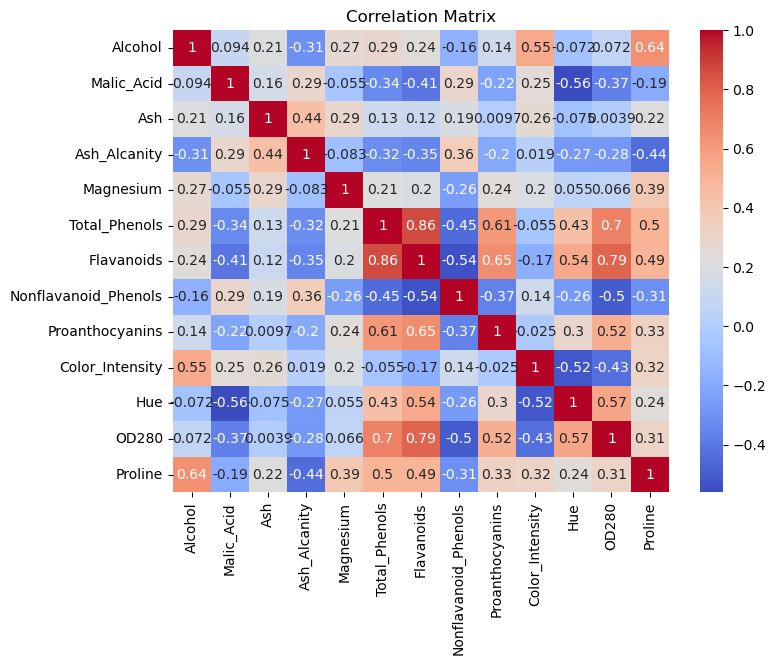

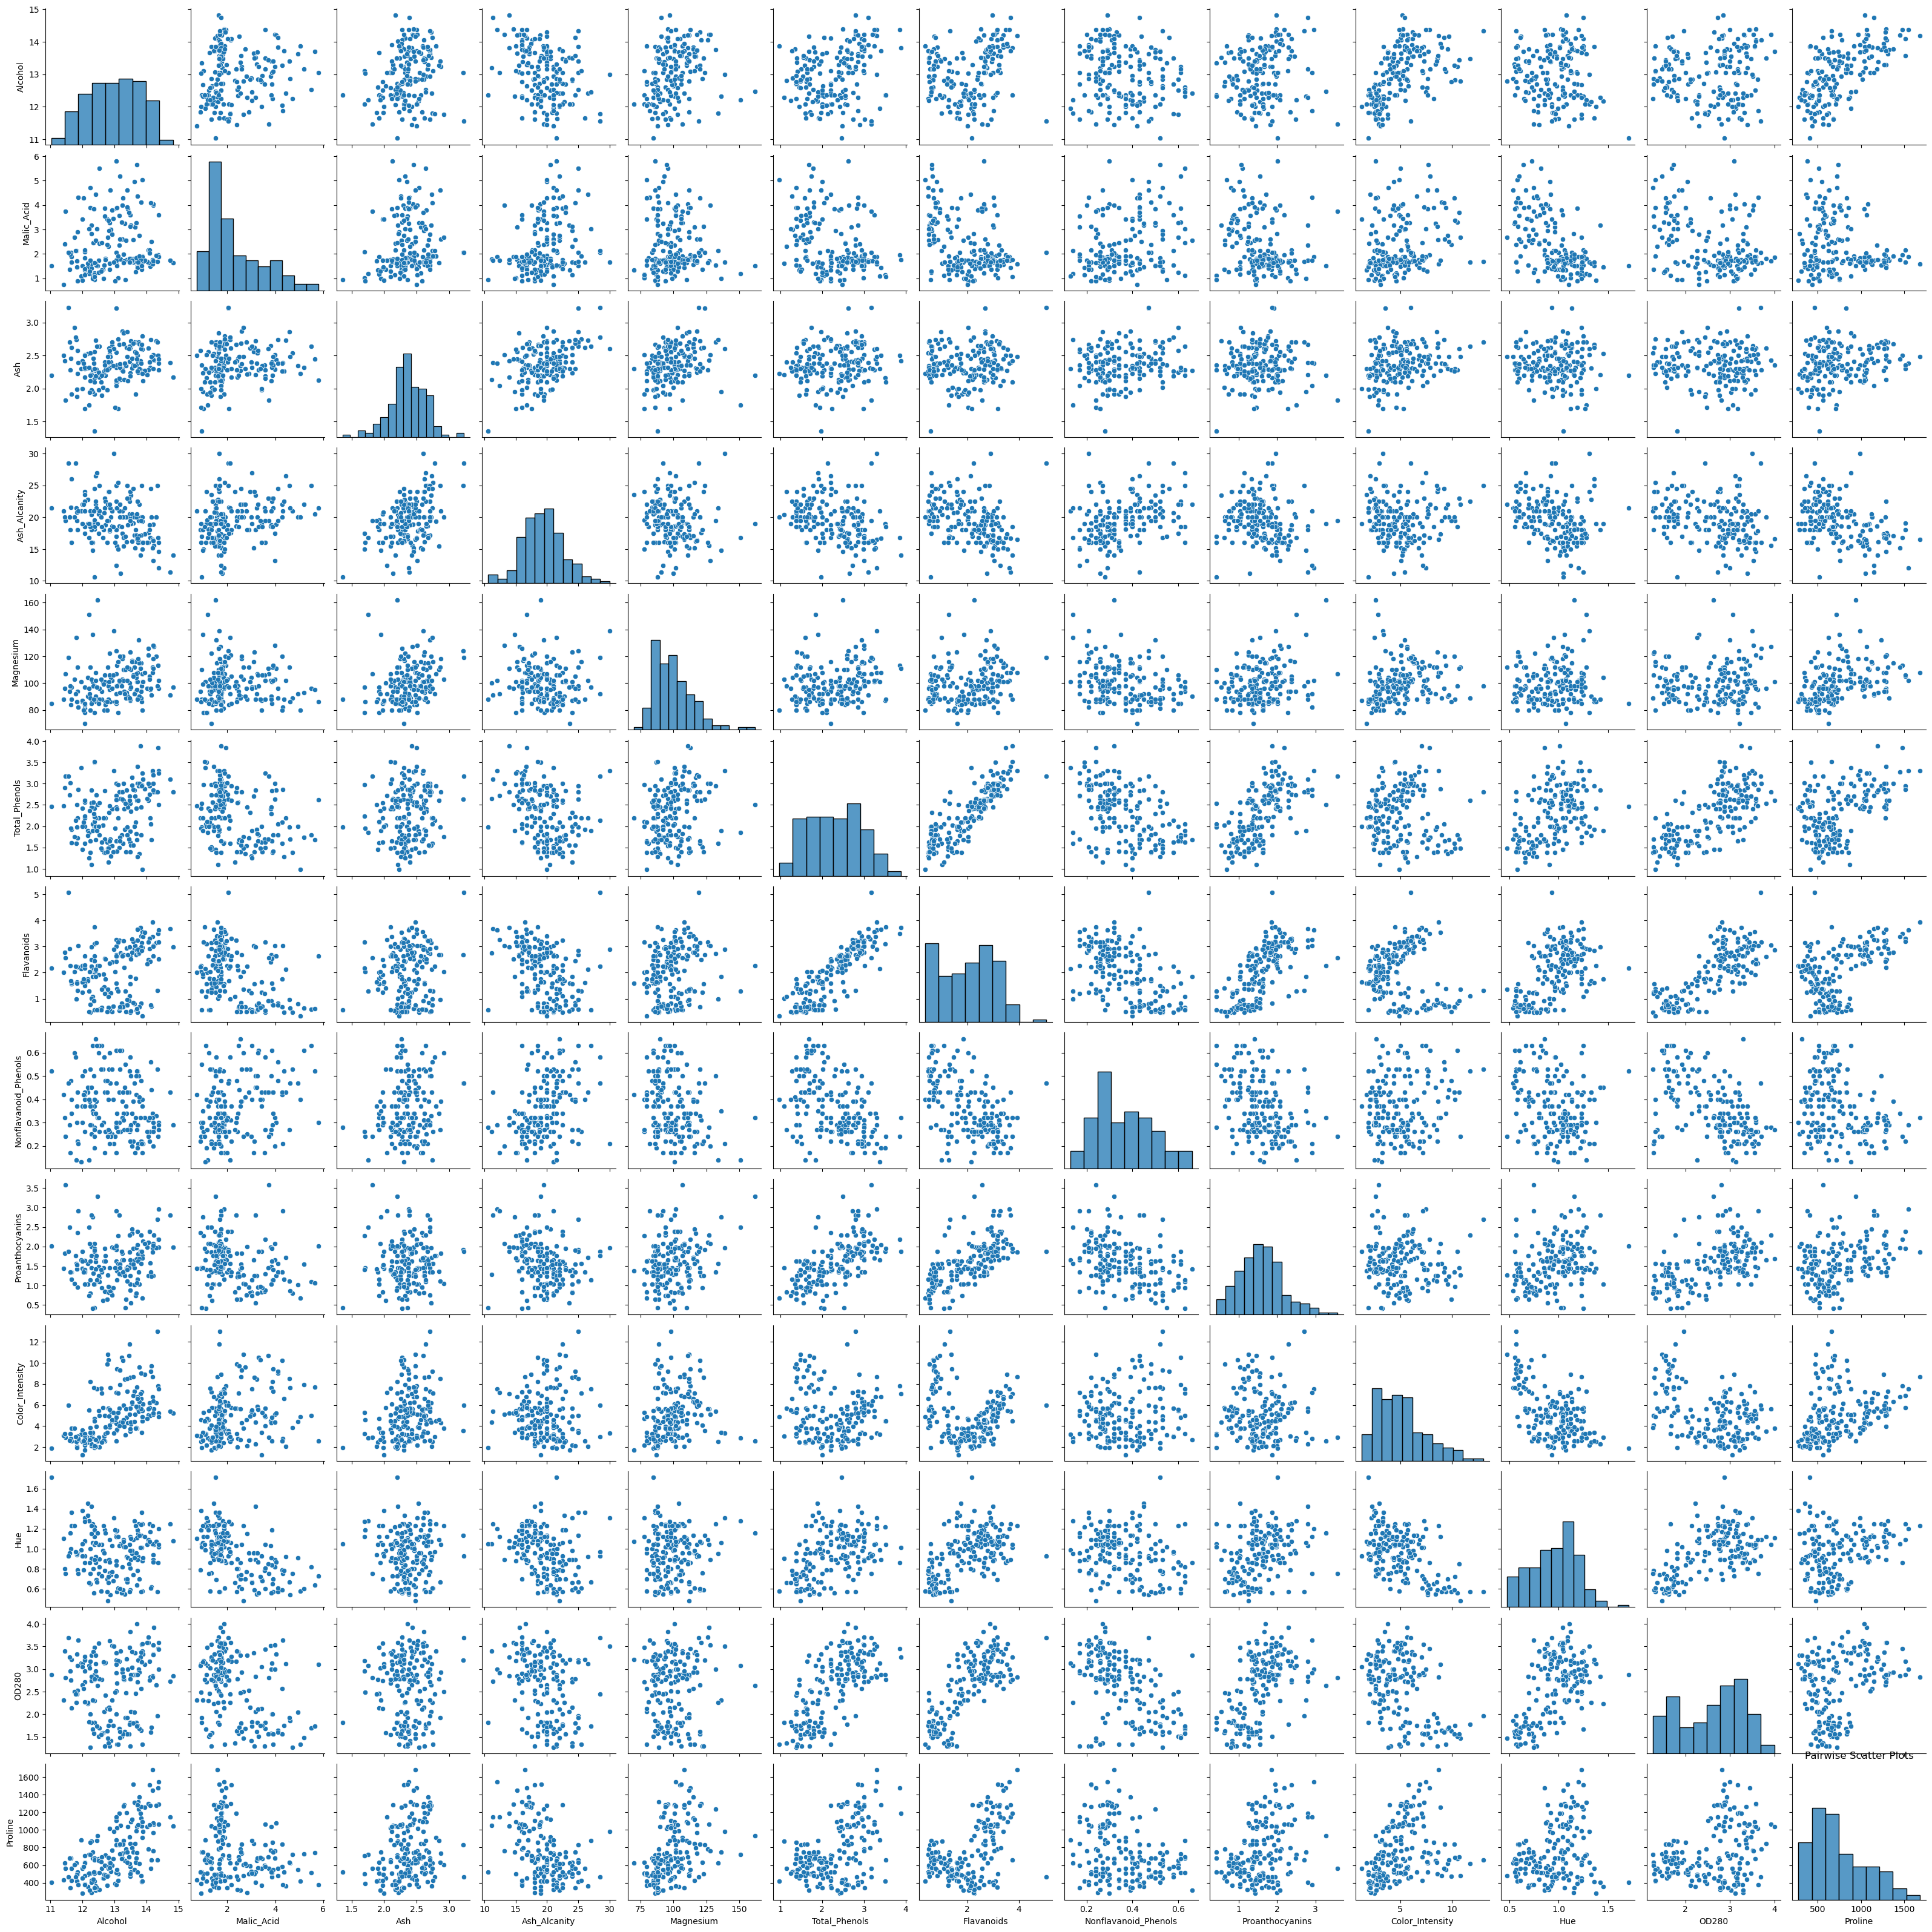

In [9]:
# Explore the relationship between variables in dataset:

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Create pairwise scatter plots
sns.pairplot(data)
plt.title('Pairwise Scatter Plots')
plt.show()

### Perform data cleaning and outlier detection: 

In [10]:
# Check for missing values:

data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

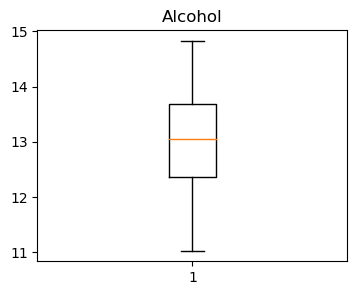

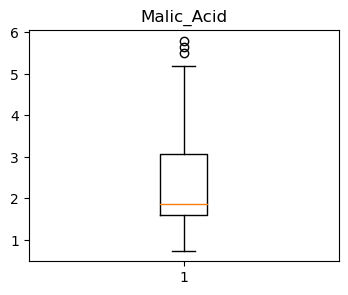

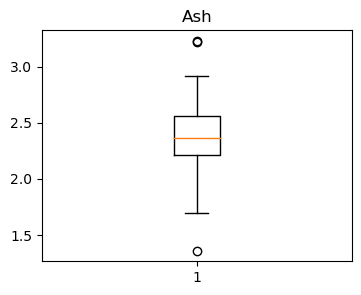

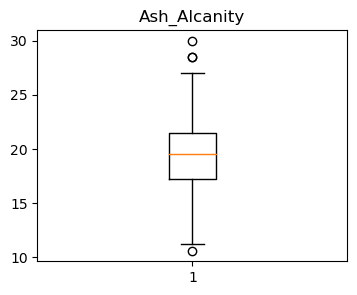

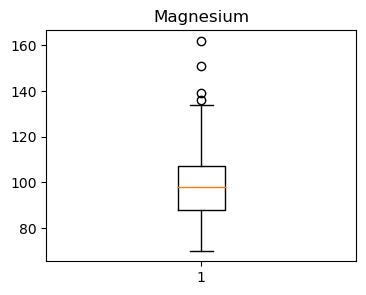

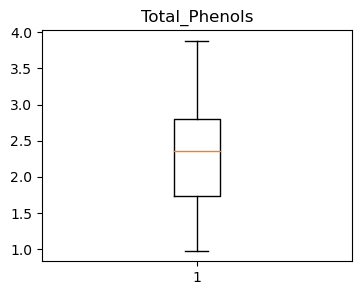

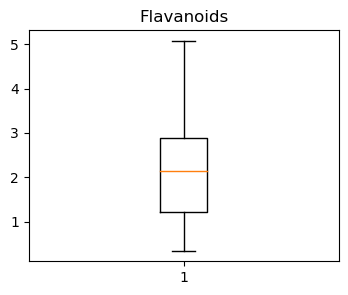

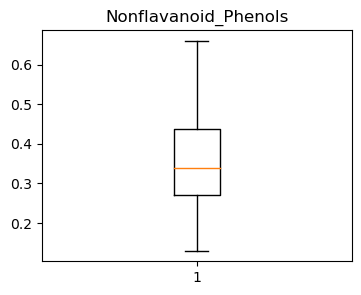

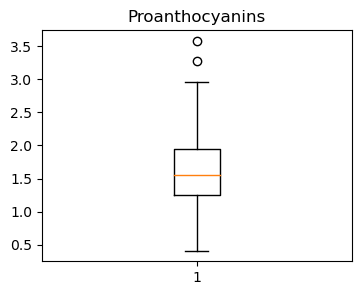

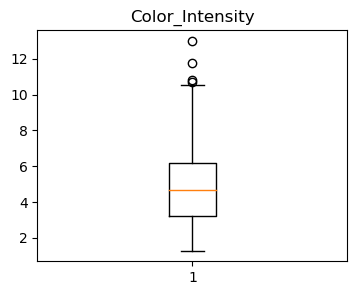

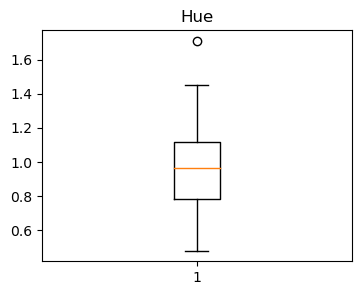

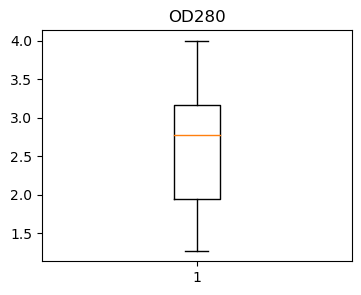

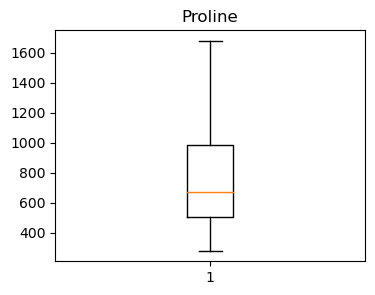

In [11]:
# Check for outliers:

num_cols = ['Alcohol' , 'Malic_Acid' , 'Ash' , 'Ash_Alcanity' , 'Magnesium' , 'Total_Phenols' , 'Flavanoids' , 'Nonflavanoid_Phenols' , 'Proanthocyanins' , 'Color_Intensity' , 'Hue' , 'OD280' , 'Proline' ]   

for i in num_cols:
    plt.figure(figsize=(4,3))
    plt.boxplot(data[i])
    plt.title(i)

In [12]:
# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'Malic_Acid' column :

Q1 = np.percentile(data['Malic_Acid'],25,interpolation='midpoint')
Q2 = np.percentile(data['Malic_Acid'],50,interpolation='midpoint')
Q3 = np.percentile(data['Malic_Acid'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 1.605
Q2 = 1.8650000000000002
Q3 = 3.065


In [13]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 1.46


In [14]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  5.255
low_lim =  -0.585


In [15]:
outliers = []

for x in data ['Malic_Acid'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[5.8, 5.51, 5.65]


In [16]:
# Handle the outliers in the 'Malic_Acid' column of the dataset:

data['Malic_Acid'] = np.where(data['Malic_Acid'] > up_lim, up_lim, np.where(data['Malic_Acid'] < low_lim, low_lim, data['Malic_Acid']))

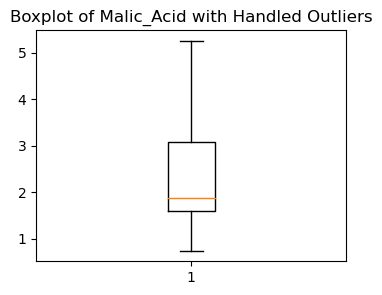

In [17]:
# Again check for outliers after filling:

plt.figure(figsize=(4, 3))
plt.boxplot(data['Malic_Acid'])
plt.title('Boxplot of Malic_Acid with Handled Outliers')
plt.show()

In [18]:
# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'Ash' column :

Q1 = np.percentile(data['Ash'],25,interpolation='midpoint')
Q2 = np.percentile(data['Ash'],50,interpolation='midpoint')
Q3 = np.percentile(data['Ash'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 2.21
Q2 = 2.36
Q3 = 2.5549999999999997


In [19]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 0.34499999999999975


In [20]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  3.0724999999999993
low_lim =  1.6925000000000003


In [21]:
outliers = []

for x in data ['Ash'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[3.22, 1.36, 3.23]


In [22]:
# Handle the outliers in the 'Ash' column of the dataset:

data['Ash'] = np.where(data['Ash'] > up_lim, up_lim, np.where(data['Ash'] < low_lim, low_lim, data['Ash']))

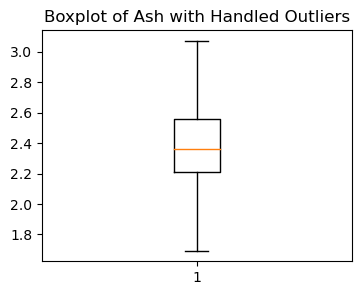

In [23]:
# Again check for outliers after filling:

plt.figure(figsize=(4, 3))
plt.boxplot(data['Ash'])
plt.title('Boxplot of Ash with Handled Outliers')
plt.show()

In [24]:
# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'Ash_Alcanity' column :

Q1 = np.percentile(data['Ash_Alcanity'],25,interpolation='midpoint')
Q2 = np.percentile(data['Ash_Alcanity'],50,interpolation='midpoint')
Q3 = np.percentile(data['Ash_Alcanity'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 17.2
Q2 = 19.5
Q3 = 21.5


In [25]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 4.300000000000001


In [26]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  27.950000000000003
low_lim =  10.749999999999998


In [27]:
outliers = []

for x in data ['Ash_Alcanity'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[10.6, 30.0, 28.5, 28.5]


In [28]:
# Handle the outliers in the 'Ash_Alcanity' column of the dataset:

data['Ash_Alcanity'] = np.where(data['Ash_Alcanity'] > up_lim, up_lim, np.where(data['Ash_Alcanity'] < low_lim, low_lim, data['Ash_Alcanity']))

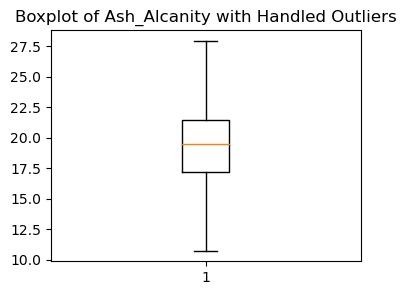

In [29]:
# Again check for outliers after filling:

plt.figure(figsize=(4, 3))
plt.boxplot(data['Ash_Alcanity'])
plt.title('Boxplot of Ash_Alcanity with Handled Outliers')
plt.show()

In [30]:
# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'Magnesium' column :

Q1 = np.percentile(data['Magnesium'],25,interpolation='midpoint')
Q2 = np.percentile(data['Magnesium'],50,interpolation='midpoint')
Q3 = np.percentile(data['Magnesium'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 88.0
Q2 = 98.0
Q3 = 107.0


In [31]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 19.0


In [32]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  135.5
low_lim =  59.5


In [33]:
outliers = []

for x in data ['Magnesium'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[151, 139, 136, 162]


In [34]:
# Handle the outliers in the 'Magnesium' column of the dataset:

data['Magnesium'] = np.where(data['Magnesium'] > up_lim, up_lim, np.where(data['Magnesium'] < low_lim, low_lim, data['Magnesium']))

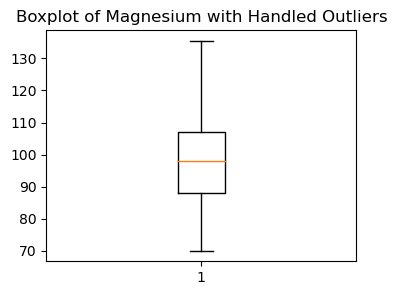

In [35]:
# Again check for outliers after filling:

plt.figure(figsize=(4, 3))
plt.boxplot(data['Magnesium'])
plt.title('Boxplot of Magnesium with Handled Outliers')
plt.show()

In [36]:
# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'Proanthocyanins' column :

Q1 = np.percentile(data['Proanthocyanins'],25,interpolation='midpoint')
Q2 = np.percentile(data['Proanthocyanins'],50,interpolation='midpoint')
Q3 = np.percentile(data['Proanthocyanins'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 1.25
Q2 = 1.5550000000000002
Q3 = 1.95


In [37]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 0.7


In [38]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  3.0
low_lim =  0.20000000000000018


In [39]:
outliers = []

for x in data ['Proanthocyanins'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[3.28, 3.58]


In [40]:
# Handle the outliers in the 'Proanthocyanins' column of the dataset:

data['Proanthocyanins'] = np.where(data['Proanthocyanins'] > up_lim, up_lim, np.where(data['Proanthocyanins'] < low_lim, low_lim, data['Proanthocyanins']))

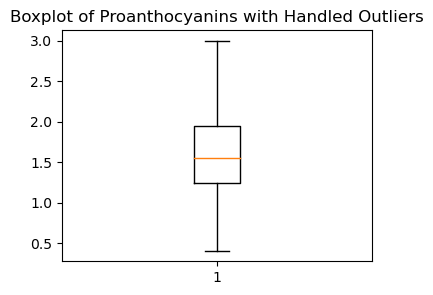

In [41]:
# Again check for outliers after filling:

plt.figure(figsize=(4, 3))
plt.boxplot(data['Proanthocyanins'])
plt.title('Boxplot of Proanthocyanins with Handled Outliers')
plt.show()

In [42]:
# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'Color_Intensity' column :

Q1 = np.percentile(data['Color_Intensity'],25,interpolation='midpoint')
Q2 = np.percentile(data['Color_Intensity'],50,interpolation='midpoint')
Q3 = np.percentile(data['Color_Intensity'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 3.23
Q2 = 4.6899999999999995
Q3 = 6.2


In [43]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 2.97


In [44]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  10.655000000000001
low_lim =  -1.225


In [45]:
outliers = []

for x in data ['Color_Intensity'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[10.8, 13.0, 11.75, 10.68]


In [46]:
# Handle the outliers in the 'Color_Intensity' column of the dataset:

data['Color_Intensity'] = np.where(data['Color_Intensity'] > up_lim, up_lim, np.where(data['Color_Intensity'] < low_lim, low_lim, data['Color_Intensity']))

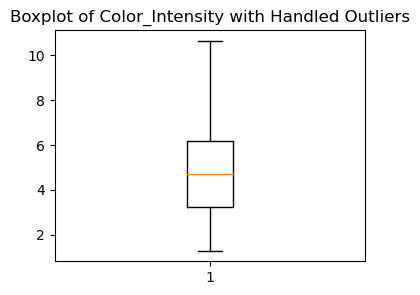

In [47]:
# Again check for outliers after filling:

plt.figure(figsize=(4, 3))
plt.boxplot(data['Color_Intensity'])
plt.title('Boxplot of Color_Intensity with Handled Outliers')
plt.show()

In [48]:
# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'Hue' column :

Q1 = np.percentile(data['Hue'],25,interpolation='midpoint')
Q2 = np.percentile(data['Hue'],50,interpolation='midpoint')
Q3 = np.percentile(data['Hue'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 0.785
Q2 = 0.965
Q3 = 1.12


In [49]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 0.3350000000000001


In [50]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  1.6225000000000003
low_lim =  0.28249999999999986


In [51]:
outliers = []

for x in data ['Hue'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[1.71]


In [52]:
# Handle the outliers in the 'Hue' column of the dataset:

data['Hue'] = np.where(data['Hue'] > up_lim, up_lim, np.where(data['Hue'] < low_lim, low_lim, data['Hue']))

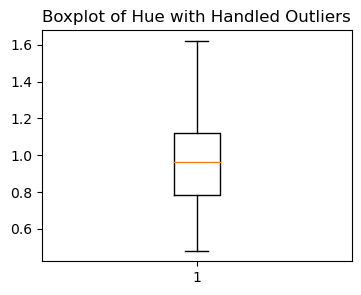

In [53]:
# Again check for outliers after filling:

plt.figure(figsize=(4, 3))
plt.boxplot(data['Hue'])
plt.title('Boxplot of Hue with Handled Outliers')
plt.show()

In [54]:
# Standardize the features: 
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data)

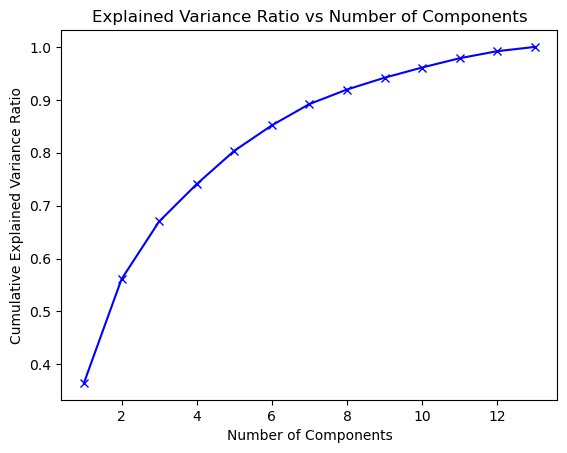

In [55]:
# Perform PCA and obtain explained variance ratios:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the explained variance ratios
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), 'bx-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.show()

In [56]:
# Perform PCA
pca = PCA(n_components=2)     #we select n_components=2 as it captures a substantial portion of the variance while reducing the dimensionality of the data.
X_pca = pca.fit_transform(scaled_data)

In [57]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.36478933 0.19614288]


In [58]:
# Convert the numpy array to a pandas DataFrame
X_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Display the DataFrame
X_pca.head()

,PCA1,PCA2
0,3.358011,-1.520821
1,2.229443,0.332889
2,2.539566,-1.038150
3,3.780555,-2.783620
4,1.016268,-0.956354


In [59]:
X = X_pca

In [60]:
X = X.to_numpy()

## <font color = green>K- Means Clustering :

### Finding the Optimum Number of Clusters (K) using Elbow Method: 

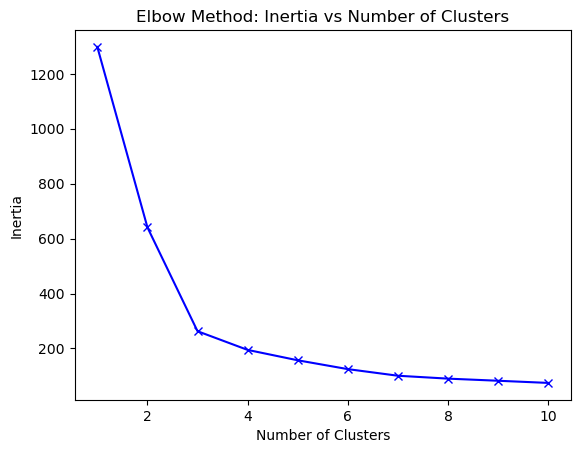

In [61]:
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Plot the inertia values
plt.plot(range(1, 11), wcss, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia vs Number of Clusters')
plt.show()

Number of clusters: 2, Silhouette score: 0.4723858113943975
Number of clusters: 3, Silhouette score: 0.561369176701287
Number of clusters: 4, Silhouette score: 0.49077217150542957
Number of clusters: 5, Silhouette score: 0.441849725059856
Number of clusters: 6, Silhouette score: 0.41782537646694773
Number of clusters: 7, Silhouette score: 0.424707861625346
Number of clusters: 8, Silhouette score: 0.4092917034016006
Number of clusters: 9, Silhouette score: 0.4088161175406495
Number of clusters: 10, Silhouette score: 0.38690716651740137


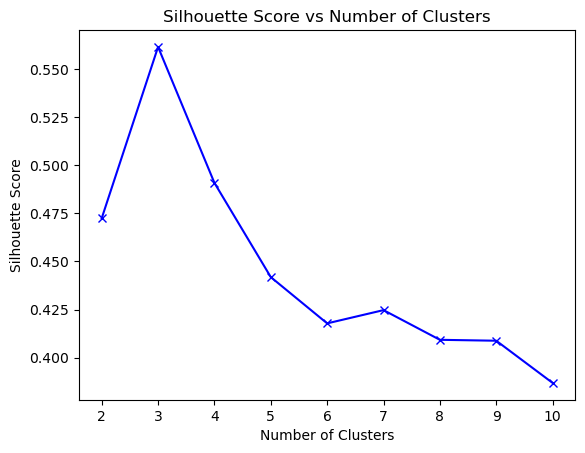

In [62]:
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Number of clusters: {i}, Silhouette score: {score}")

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

### Creating the K-Means Model with Optimum Number of Clusters:

In [63]:
# Create the K-means model with the optimum number of clusters:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Get the cluster labels:
kmeans_labels = kmeans.labels_

# Add a new column for cluster labels in the DataFrame:
data['Cluster'] = kmeans_labels

# Display the updated data with cluster labels:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [64]:
data.shape

(178, 14)

### Visualize the clusters obtained from the K-means clustering algorithm :

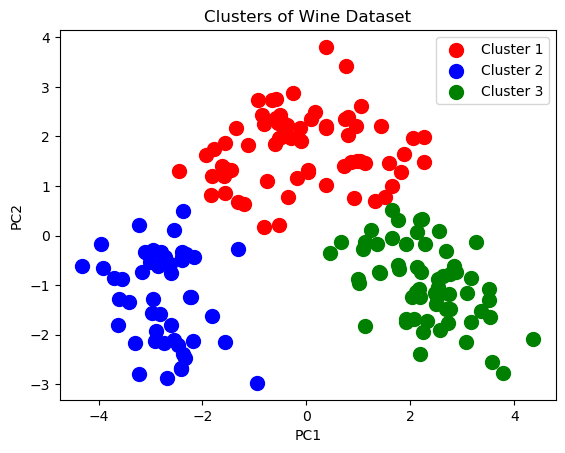

In [65]:
# Scatter plot of data points for each cluster:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# Set title and axis labels
plt.title('Clusters of Wine Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [66]:
#Silhouette score of kmeans clustering:

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)

# Print the Silhouette Score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.561369176701287


## <font color = green>Agglomerative Hierarchical Clustering:

### Finding the Optimum Number of Clusters using Dendrogram:

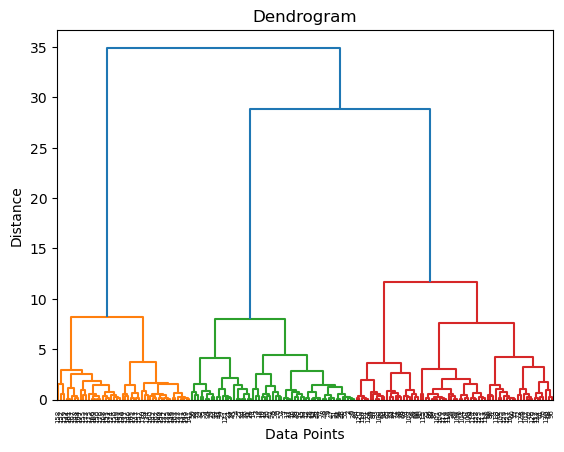

In [67]:
# Using the dendrogram to find the optimal number of clusters:

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Plot the dendrogram:
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

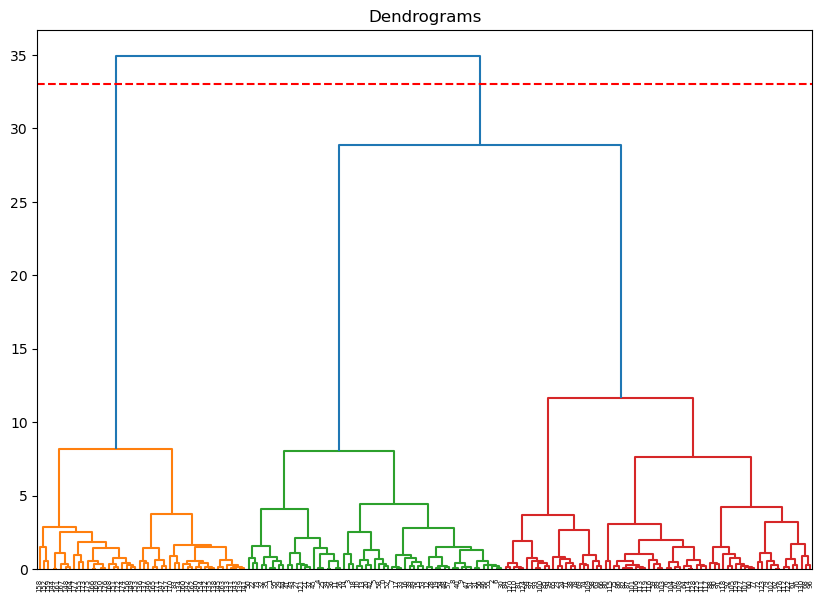

In [68]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dendrogram = shc.dendrogram(shc.linkage(X,method='ward'))
plt.axhline(y=33, color = 'r', linestyle = '--')

## Creating Clustering Models with Optimum Number of Clusters:

In [69]:
# Create the Agglomerative Hierarchical Clustering model with the optimal number of clusters
agglomerative = AgglomerativeClustering(n_clusters= 2 , affinity = 'euclidean', linkage = 'ward')
agglomerative_labels = agglomerative.fit_predict(X)

# Get the cluster labels:
agglomerative_labels = agglomerative.labels_

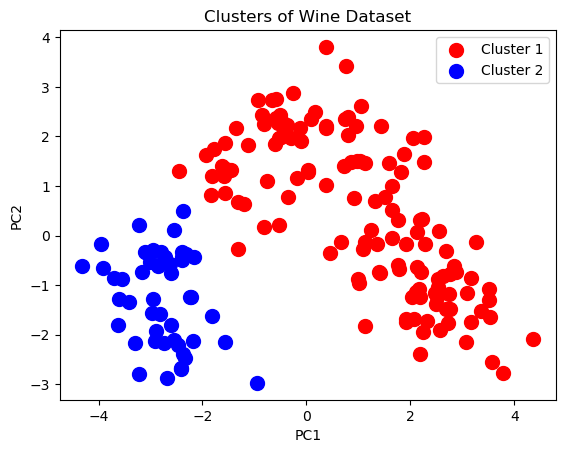

In [70]:
# Plotting data points from Cluster 1
plt.scatter(X[agglomerative_labels == 0, 0], X[agglomerative_labels == 0, 1], s=100, c='red', label='Cluster 1')

# Plotting data points from Cluster 2
plt.scatter(X[agglomerative_labels == 1, 0], X[agglomerative_labels == 1, 1], s=100, c='blue', label='Cluster 2')



# Set title and axis labels
plt.title('Clusters of Wine Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [71]:
# Calculate the silhouette score for Agglomerative Clustering:
silhouette_avg = silhouette_score(X, agglomerative_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4712956532707249


## <font color = green>DBSCAN Clustering:

In [72]:
# Fit the DBSCAN model and obtain the cluster labels
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

# Get the cluster labels
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Print the number of clusters
print("Number of clusters formed by DBSCAN:", n_clusters_)

Number of clusters formed by DBSCAN: 2


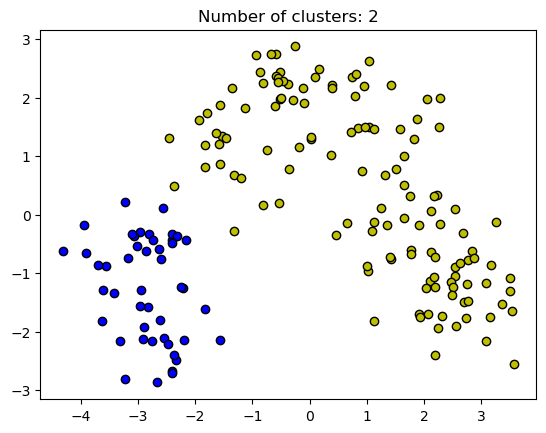

In [73]:
# Plot result:

# Create a mask for core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Define colors for different clusters
colors = ['y', 'b', 'g', 'r'][:n_clusters_]

# Plot the clusters
for k, col in zip(range(n_clusters_), colors):
    if k == -1:
        # Black used for noise
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Number of clusters: %d' % n_clusters_)
plt.show()

###### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups together data points that are close to each other in feature space and separates regions of lower density.With DBSCAN, the optimal number of clusters is not predetermined but is determined based on the density and separation of data points (DBSCAN does not require specifying the number of clusters beforehand. Instead, it determines the clusters based on the density and separation of data points).

In [74]:
# Check the number of unique labels
num_unique_labels = len(np.unique(labels))

if num_unique_labels > 1:
    # Calculate the Silhouette Score
    silhouette_avg = silhouette_score(X, labels)
    print("DBSCAN Silhouette Score:", silhouette_avg)
else:
    print("Silhouette Score cannot be calculated as only one cluster is detected.")

DBSCAN Silhouette Score: 0.36861841254999295


## Results: 

In [75]:
# Calculate the Calinski-Harabasz score
calinski_score = calinski_harabasz_score(X, kmeans_labels)
print("KMeans Clustering Calinski-Harabasz Score:", calinski_score)

# Calculate the Silhouette score
silhouette_avg = silhouette_score(X, kmeans_labels)
print("KMeans Clustering Silhouette Score:", silhouette_avg)

KMeans Clustering Calinski-Harabasz Score: 344.603974635218
KMeans Clustering Silhouette Score: 0.561369176701287


In [76]:
# Calculate the Calinski-Harabasz score
calinski_score = calinski_harabasz_score(X, agglomerative_labels)
print("Agglomerative Hierarchical Clustering Calinski-Harabasz Score:", calinski_score)

# Calculate the Silhouette score
silhouette_avg = silhouette_score(X, agglomerative_labels)
print("Agglomerative Hierarchical Clustering Silhouette Score:", silhouette_avg)

Agglomerative Hierarchical Clustering Calinski-Harabasz Score: 156.21847403858737
Agglomerative Hierarchical Clustering Silhouette Score: 0.4712956532707249


In [77]:
if num_unique_labels > 1:
    
    # Calculate the Calinski-Harabasz score
    calinski_score = calinski_harabasz_score(X,labels)
    print("DBSCAN Clustering Calinski-Harabasz Score:", calinski_score)
    
    # Calculate the Silhouette Score
    silhouette_avg = silhouette_score(X, labels)
    print("DBSCAN Clustering Silhouette Score:", silhouette_avg)
    
else:
    print("Evaluation metrics cannot be calculated. num_unique_labels < 1")

DBSCAN Clustering Calinski-Harabasz Score: 74.55239429644391
DBSCAN Clustering Silhouette Score: 0.36861841254999295


In [78]:
scores = {'KMeans': ('KMeans Clustering Calinski-Harabasz Score', 'KMeans Clustering Silhouette Score'),
          'Agglomerative Hierarchical Clustering': ('Agglomerative Hierarchical Clustering Calinski-Harabasz Score', 'Agglomerative Hierarchical Clustering Silhouette Score'),
          'DBSCAN': ('DBSCAN Clustering Calinski-Harabasz Score', 'DBSCAN Clustering Silhouette Score')}

# Compare the scores and determine the best algorithm
best_algorithm = max(scores, key=lambda k: scores[k])
print("Best Algorithm:", best_algorithm)

Best Algorithm: KMeans
